In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from actor_critic_discrete import Agent

In [2]:
def plot_learning_curve(scores, x):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

In [3]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    n_games = 3001
    agent = Agent(gamma=0.99, lr=0.0005, input_dims=(env.observation_space.shape),
                                n_actions=env.action_space.n, fc1_dims=256, fc2_dims=128)

    scores = []
    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        n = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.learn(observation, reward, observation_, done, n)
            observation = observation_
            n += 1
        
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score)

episode  0 score 15.00 average score 15.00
episode  1 score 20.00 average score 17.50
episode  2 score 33.00 average score 22.67
episode  3 score 51.00 average score 29.75
episode  4 score 21.00 average score 28.00
episode  5 score 23.00 average score 27.17
episode  6 score 29.00 average score 27.43
episode  7 score 23.00 average score 26.88
episode  8 score 23.00 average score 26.44
episode  9 score 13.00 average score 25.10
episode  10 score 22.00 average score 24.82
episode  11 score 10.00 average score 23.58
episode  12 score 25.00 average score 23.69
episode  13 score 14.00 average score 23.00
episode  14 score 22.00 average score 22.93
episode  15 score 17.00 average score 22.56
episode  16 score 19.00 average score 22.35
episode  17 score 42.00 average score 23.44
episode  18 score 14.00 average score 22.95
episode  19 score 16.00 average score 22.60
episode  20 score 23.00 average score 22.62
episode  21 score 66.00 average score 24.59
episode  22 score 28.00 average score 24.7

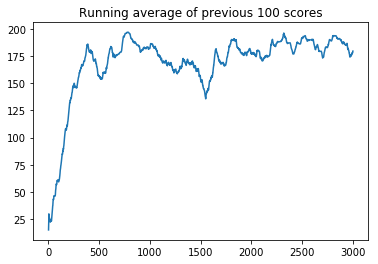

In [4]:
x = [i+1 for i in range(len(scores))]
plot_learning_curve(scores, x)